### Import required libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
from scipy.stats import randint
import pydotplus
import sys
import matplotlib.pyplot as plt
import seaborn as sns


### Define trainModel Function

In [2]:
def trainModel(X_train, y_train, withHyperParameters=False):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    if(withHyperParameters):
        param_dist = {
            'n_estimators': randint(50,500),
            'max_depth'   : randint(1,20)
        }
        rand_search = RandomizedSearchCV(rf, param_dist, n_iter=5, cv=5)
        rand_search.fit(X_train, y_train)
        return rand_search
    rf.fit(X_train, y_train)
    return rf


### Define predictModel Function

In [3]:
def predictModel(model, X_test):
    return model.predict(X_test)

### Define evaluateModel Function

In [4]:
def evaluateModel(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


### Define displayMetrics Function

In [5]:
def plot_confusion_matrix_general(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
def displayMetrics(y_test, y_pred, accuracy, precision, recall, f1):
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("\nConfusion Matrix: ",confusion_matrix(y_test, y_pred))
    plot_confusion_matrix_general(y_test, y_pred, ['1', '2'])

### Define display tree function

In [7]:
def display_tree(model, feature_names, class_names):
    tree = model.estimators_[0]

    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=feature_names, 
                               class_names=class_names,
                               filled=True, 
                               rounded=True,
                               max_depth=2,
                               special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data)

    Image(graph.create_png())

    graph.write_png('../random_forest_tree/decision_tree.png')

### Random Forest initialization function

In [8]:
def randomForest(hyperparameters=False):
    apples = pd.read_csv('../datasets/apple_quality_no_id.csv')

    label_encoder = LabelEncoder()
    apples['Quality'] = label_encoder.fit_transform(apples['Quality'])

    X = apples.drop(columns=['Quality'])
    y = apples['Quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model = trainModel(X_train, y_train, hyperparameters)
    if(hyperparameters):
        best_rf = model.best_estimator_
        print("Best Parameters: ", model.best_params_)
        print("best_rf: ", best_rf)
        model = best_rf

    y_pred = predictModel(model, X_test)
    accuracy, precision, recall, f1 = evaluateModel(y_test, y_pred)
    displayMetrics(y_test, y_pred, accuracy, precision, recall, f1)
    display_tree(model, X_train.columns, label_encoder.classes_)


### Start Random Forest with no hyperparameters

Accuracy:  0.8925
Precision:  0.8925
Recall:  0.8925
F1 Score:  0.8925

Confusion Matrix:  [[358  43]
 [ 43 356]]


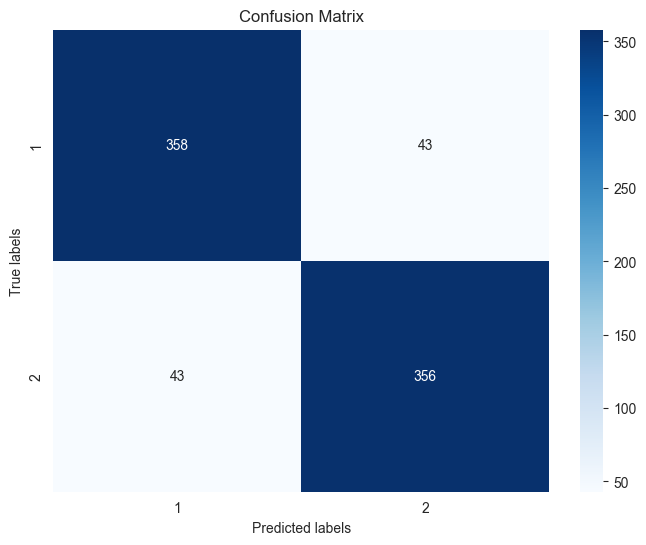

In [9]:
randomForest(False)

### Start Random Forest with hyperparameters

Best Parameters:  {'max_depth': 15, 'n_estimators': 418}
best_rf:  RandomForestClassifier(max_depth=15, n_estimators=418, random_state=42)
Accuracy:  0.905
Precision:  0.9053719062541046
Recall:  0.905
F1 Score:  0.9049821847163619

Confusion Matrix:  [[357  44]
 [ 32 367]]


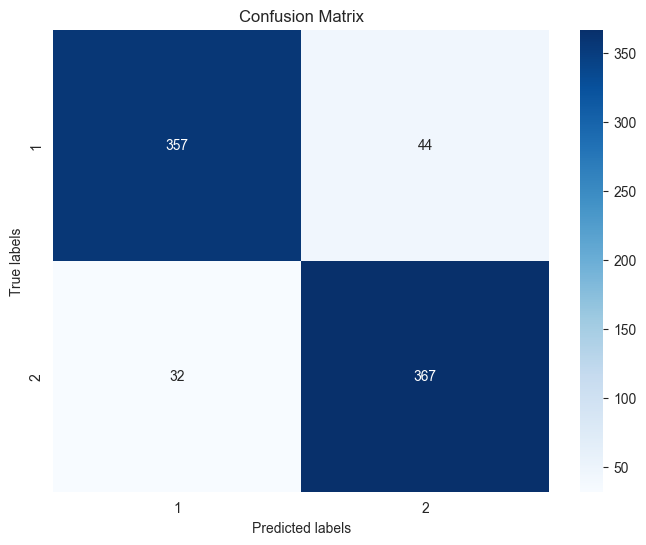

In [10]:
randomForest(True)